# Forest Fire In Brazil Dataset

Forest fire is a serious problem for the preservation of the Trophical Forest. 

Dataset is from Kaggle.com

#### This dataset is used for data cleaning and answering the the following questions:
    1. Total number of fires registered
    2. In whch month were maximum forest fire reported
    3. In whch year were maximum forest fire reported
    4. Which state has the maximum forest fire reported
    5. Find the total number of fires reported in the amazonas
    6. find the total number of fires reported in the amazonas year wise
    7. Find the total number of fires reported in the amazonas day wise
    8. Find total number of fires reported in 2015 and visualize each month
    9. Find the average number of fires reported from hightest to lowest[state wise]
    10. Find the state names of where fire were reported in dec
    

In [50]:
# import the necessary labraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [52]:
# loading in the dataset and changing the dtype of date column

df = pd.read_csv(r"C:\Users\Henry Oguns\Desktop\DATA ANALYSIS\Portfolio Projects\PortfolioProjects\Project _Datasets\amazon.csv", 
                 parse_dates = ["date"])
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
# checking the 5 first and last rows

df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
# Displaying the shape of the data set

df.shape

(6454, 5)

We have 6,454 number of Rows and 5 number of Columns

In [7]:
# finding information on the dataset and memory storage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


The dataset has no null value in it

In [8]:
# checking for duplicates and droping them

dup = df.duplicated().any()
dup

True

In [9]:
df.drop_duplicates()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [53]:
# Renaming Month Names to English

df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [59]:
df['month_new']=df['month'].map({'Janeiro':'Jan',
            'Fevereiro':'Feb',
            'Mar�o':'Mar',
            'Abril':'Apr',
            'Maio':'May',
            'Junho':'Jun',
            'Julho':'Jul',
            'Agosto':'Aug',
            'Setembro':'Sep',
              'Outubro':'Oct',
              'Novembro':'Nov',
              'Dezembro':'Dec'
        })

In [73]:
df['month_new'].value_counts()

Jan    541
Nov    540
Jul    540
Sep    540
Apr    540
Oct    540
Aug    540
Jun    540
Mar    540
Feb    540
May    540
Dec    513
Name: month_new, dtype: int64

In [60]:
# Replacing '�' in para state name to 'a', Para

df.state = df.state.str.replace('�', 'a', regex =True)

In [71]:
df1= df.sample(frac = 0.05)
df1

,year,state,month,number,date,month_new
3268,1998,Para,Setembro,6.237,1998-01-01,Sep
1795,1999,Espirito Santo,Julho,9.000,1999-01-01,Jul
274,2012,Alagoas,Fevereiro,41.000,2012-01-01,Feb
3186,2016,Para,Abril,66.000,2016-01-01,Apr
3090,1999,Minas Gerais,Dezembro,32.000,1999-01-01,Dec
...,...,...,...,...,...,...
6159,2001,Sergipe,Outubro,5.000,2001-01-01,Oct
6243,2006,Tocantins,Fevereiro,14.000,2006-01-01,Feb
3376,2007,Paraiba,Fevereiro,7.000,2007-01-01,Feb
6338,2001,Tocantins,Julho,830.000,2001-01-01,Jul


In [67]:
# Getting the overall statistics of the dataset

df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


# Exploratory Data Analysis

In [17]:
# 1. Total number of fires registered

df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [18]:
df['number'].sum()

698924.073

We have 698,924.073 fire registered in this dataset

In [74]:
# 2. Which month has the maximum forest fire reported

df1 =df.groupby('month_new')['number'].sum().sort_values(ascending =False).reset_index()
df1

,month_new,number
0,Jul,92326.113
1,Oct,88681.579
2,Aug,88050.435
3,Nov,85508.054
4,Sep,58578.305
5,Dec,57535.480
6,Jun,56010.675
7,Jan,47747.844
8,May,34731.363
9,Feb,30848.050


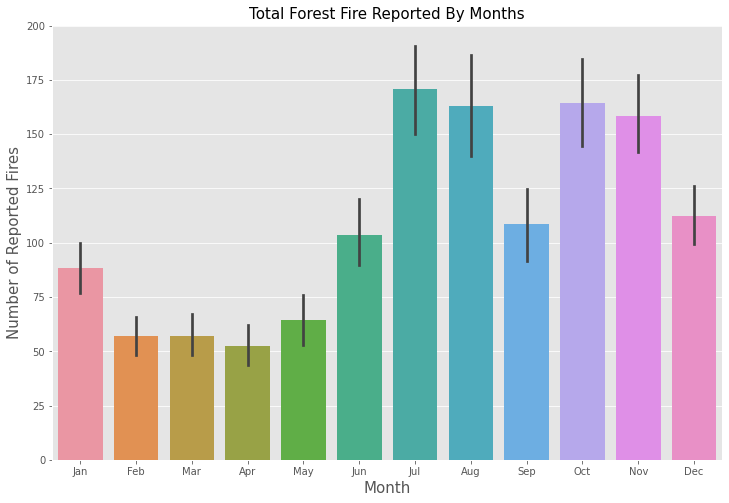

In [82]:
sns.barplot(x='month_new', y='number', data=df)
plt.title('Total Forest Fire Reported By Months', fontsize= 15)
plt.xlabel('Month', fontsize= 15)
plt.ylabel('Number of Reported Fires', fontsize= 15)
plt.show()

The month July has the highest with 92,326.113 forest fire reports

The year 2003 has the highest report fire of 42,760.674 reports

In [84]:
# 4. Which state has the maximum forest fire reported

df3 =df.groupby('state')['number'].sum().sort_values(ascending =False)
df3.reset_index()

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52435.918
2,Sao Paulo,51121.198
3,Rio,45160.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


In [85]:
# 5. find the total number of fires reported in the amazonas

df[df['state']=='Amazonas']['number'].sum()

30650.129

Total number of 30,650.129 fire report ware reported in Amazonas

In [87]:
# 6. find the total number of fires reported in the amazonas year wise

df4= df[df['state']=='Amazonas']
df5 = df4.groupby('year')['number'].max().reset_index()
df5

,year,number
0,1998,321.0
1,1999,479.0
2,2000,189.0
3,2001,501.0
4,2002,928.0
5,2003,725.0
6,2004,911.0
7,2005,676.0
8,2006,721.0
9,2007,215.0


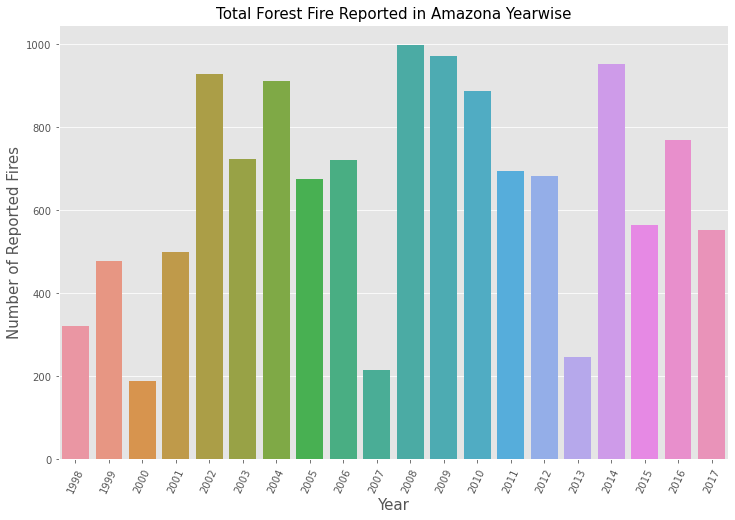

In [90]:
sns.barplot(x='year', y='number', data=df5)
plt.title('Total Forest Fire Reported in Amazona Yearwise', fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Reported Fires', fontsize= 15)
plt.xticks(rotation=65)
plt.show()

In [94]:
# 7. find the total number of fires reported in the amazonas day wise
df6= df[df['state']=='Amazonas']

In [91]:
df6.groupby(df['date'].dt.dayofweek).sum().number

import calendar

day = [calendar.day_name[x] for x in range (0,7)]
day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [92]:
day = df6.groupby(df['date'].dt.dayofweek).sum().number

import calendar

day.index = [calendar.day_name[x] for x in range (0,7)]
day.reset_index()

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


In [39]:
# 8. find total number of fires reported in 2015 and visualize each month

df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [93]:
df8 = df[df['year']==2015]
df8

,year,state,month,number,date,month_new
17,2015,Acre,Janeiro,1.000,2015-01-01,Jan
37,2015,Acre,Fevereiro,2.000,2015-01-01,Feb
57,2015,Acre,Mar�o,2.000,2015-01-01,Mar
77,2015,Acre,Abril,3.000,2015-01-01,Apr
97,2015,Acre,Maio,2.000,2015-01-01,May
...,...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,2015-01-01,Aug
6392,2015,Tocantins,Setembro,5.510,2015-01-01,Sep
6412,2015,Tocantins,Outubro,4.844,2015-01-01,Oct
6432,2015,Tocantins,Novembro,833.000,2015-01-01,Nov


In [41]:
df8.groupby('month_new')['number'].sum().sort_values(
ascending=False).reset_index()

,month_new,number
0,Jan,4635.000
1,Oct,4499.525
2,Jul,4364.392
3,Aug,4363.125
4,Dec,4088.522
5,Nov,4034.518
6,Jun,3260.552
7,Apr,2573.000
8,Sep,2494.658
9,May,2384.000


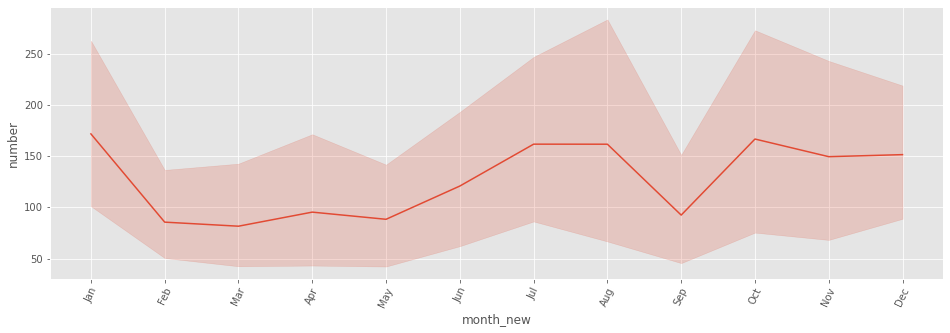

In [97]:
plt.figure(figsize=(16,5))
sns.lineplot(x='month_new', y='number', data=df8)
plt.xticks(rotation=65)
plt.show()

In [43]:
# find the average number of fires reported from hightest to lowest[state wise]

df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [44]:
df9 = df.groupby('state')['number'].mean().sort_values(
ascending=False).reset_index()
df9

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


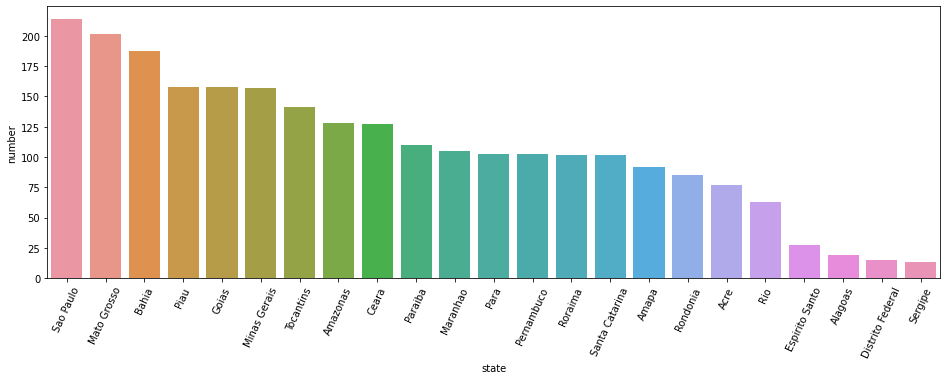

In [45]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y='number', data=df9)
plt.xticks(rotation=65)
plt.show()

In [46]:
# to find the state names of where fire were reported in dec

df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [47]:
df[df['month_new']=='Dec']['state'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Para', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)